# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

# Data Load

In [4]:
raw_data = pd.read_csv('../term_deposit_subscription_classification/preprocessed_data_files/data_after_cut_off_cleaned.csv')
raw_data.head(3)

,age,job,marital_status,education,balance_eur,housing_loan,personal_loan,communication_type,contacts_this_campaign,days_since_previous_contact,...,call_duration_minutes,days_since_previous_contact_nan,contacts_before_campaign_nan,date,weekday,month,was_contacted_before,job_group,has_loan,has_both_loan
0,55,admin.,Married,secondary,602,0,0,cellular,3,90,...,5.400000,90.0,2.0,2009-06-01,Monday,June,1,Admin/Mgmt/Tech,0,0
1,57,entrepreneur,Married,secondary,2464,0,0,cellular,1,-1,...,1.883333,NaN,NaN,2009-06-01,Monday,June,0,Entrepreneur/Self-employed,0,0
2,57,management,Married,tertiary,473,0,0,cellular,1,-1,...,4.916667,NaN,NaN,2009-06-01,Monday,June,0,Admin/Mgmt/Tech,0,0


In [5]:
df = raw_data.copy()

> უკეთესი იქნება თუ ბალანსის ცვლადს კატეგორიებად ჩავშლით

In [7]:
df['balance_eur'].describe()

count      5459.000000
mean       2046.296758
std        4088.346347
min       -1206.000000
25%         268.500000
50%         891.000000
75%        2351.500000
max      102127.000000
Name: balance_eur, dtype: float64

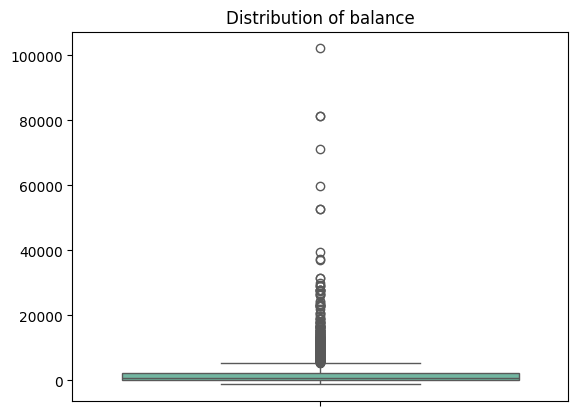

In [8]:
plt.figure()
sns.boxplot(df['balance_eur']);
plt.title('Distribution of balance')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [9]:
bins = [-np.inf, -0.01, 0.01, 1000, 5000, 20000, np.inf]
labels = ['Negative', 'Zero Balance', 'Low Positive (0-1k)', 'Medium Positive (1k-5k)', 'High Positive (5k-20k)', 'Very High Positive (>20k)']
df['balance_group_magnitude'] = pd.cut(df['balance_eur'], bins=bins, labels=labels, right=True)

> მონაცემების 10%-ს შევინახავთ ფრედიქშენის იმიტირებისთვის

In [11]:
predict_data = df.sample(frac=0.1, random_state=42)
df = df.drop(predict_data.index)

In [12]:
from preprocessing_pipeline import PreprocessingPipeline
from deposit_classifier import DepositSubscriptionClassifier

In [13]:
df.select_dtypes(['object', 'category']).columns, df.select_dtypes('number').columns

(Index(['job', 'marital_status', 'education', 'communication_type',
        'previous_campaign_outcome', 'date', 'weekday', 'month', 'job_group',
        'balance_group_magnitude'],
       dtype='object'),
 Index(['age', 'balance_eur', 'housing_loan', 'personal_loan',
        'contacts_this_campaign', 'days_since_previous_contact',
        'contacts_before_campaign', 'subscribed', 'call_duration_minutes',
        'days_since_previous_contact_nan', 'contacts_before_campaign_nan',
        'was_contacted_before', 'has_loan', 'has_both_loan'],
       dtype='object'))

In [14]:
transform_features_list = ['call_duration_minutes', 'age'] 
numeric_features_list = ['has_loan'] 
categorical_features_list = ['marital_status', 'job_group',  'education', 'balance_group_magnitude'] #'month' , 'weekday'
target_variable = 'subscribed'

In [15]:
classifier = DepositSubscriptionClassifier(
    transform_features=transform_features_list,
    numeric_features=numeric_features_list,
    categorical_features=categorical_features_list,
    target=target_variable,
    scaler_type='standard',
    models_dir='bank_marketing_models',
)

Original Training Features shape: (3930, 7)
Original Testing Features shape: (983, 7)

Fitting and transforming data using PreprocessingPipeline...
Successfully retrieved feature names after transformation.
Preprocessing complete.
Processed Training Features shape: (3930, 16)
Processed Testing Features shape: (983, 16)

========== Training: LogisticRegression ==========

--- Evaluating with Default Threshold (0.5) ---

--- Training Set Performance (Threshold: 0.5) ---
Accuracy: 0.6728
F1 Score (Macro): 0.6660
Average Precision (AP): 0.6547
AUC Score: 0.7510
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.68      0.75      0.71      2147
     Class 1       0.66      0.58      0.62      1783

    accuracy                           0.67      3930
   macro avg       0.67      0.67      0.67      3930
weighted avg       0.67      0.67      0.67      3930


--- Test Set Performance (Threshold: 0.5) ---
Accuracy: 0.6989
F1 Score (Macro): 0.6

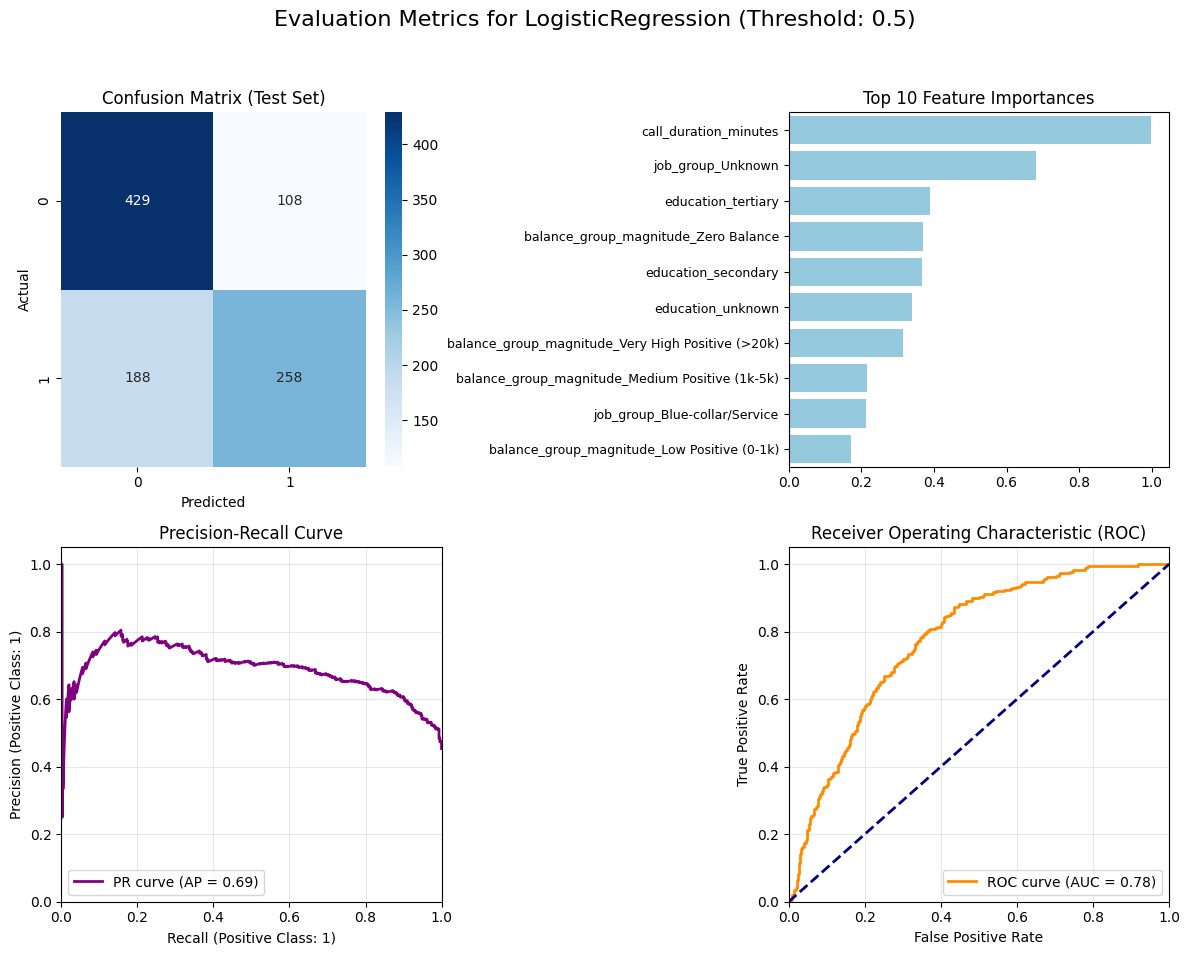

*** New best model (based on F1 Macro @ 0.5 thresh): LogisticRegression with F1: 0.6895 ***

========== Training: RandomForest ==========

--- Evaluating with Default Threshold (0.5) ---

--- Training Set Performance (Threshold: 0.5) ---
Accuracy: 0.7097
F1 Score (Macro): 0.7092
Average Precision (AP): 0.7283
AUC Score: 0.7896
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.81      0.61      0.70      2147
     Class 1       0.64      0.83      0.72      1783

    accuracy                           0.71      3930
   macro avg       0.72      0.72      0.71      3930
weighted avg       0.73      0.71      0.71      3930


--- Test Set Performance (Threshold: 0.5) ---
Accuracy: 0.7172
F1 Score (Macro): 0.7171
Average Precision (AP): 0.7038
AUC Score: 0.7700
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.80      0.64      0.71       537
     Class 1       0.65      0.81      0.72      

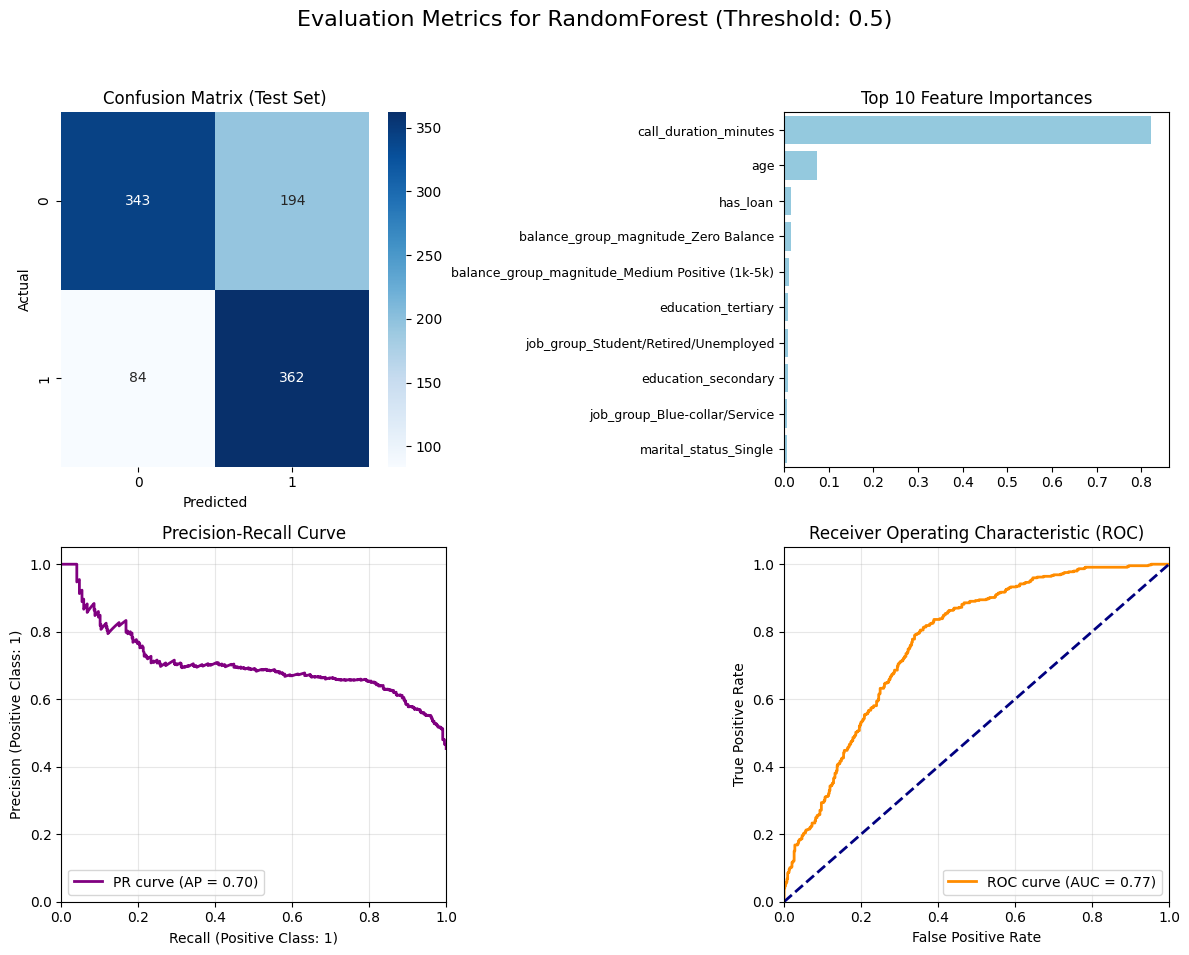

*** New best model (based on F1 Macro @ 0.5 thresh): RandomForest with F1: 0.7171 ***

========== Training: XGBoost ==========

--- Evaluating with Default Threshold (0.5) ---

--- Training Set Performance (Threshold: 0.5) ---
Accuracy: 0.7517
F1 Score (Macro): 0.7516
Average Precision (AP): 0.8057
AUC Score: 0.8455
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.83      0.69      0.75      2147
     Class 1       0.69      0.82      0.75      1783

    accuracy                           0.75      3930
   macro avg       0.76      0.76      0.75      3930
weighted avg       0.76      0.75      0.75      3930


--- Test Set Performance (Threshold: 0.5) ---
Accuracy: 0.7253
F1 Score (Macro): 0.7251
Average Precision (AP): 0.6829
AUC Score: 0.7720
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.78      0.69      0.73       537
     Class 1       0.67      0.77      0.72       446

    a

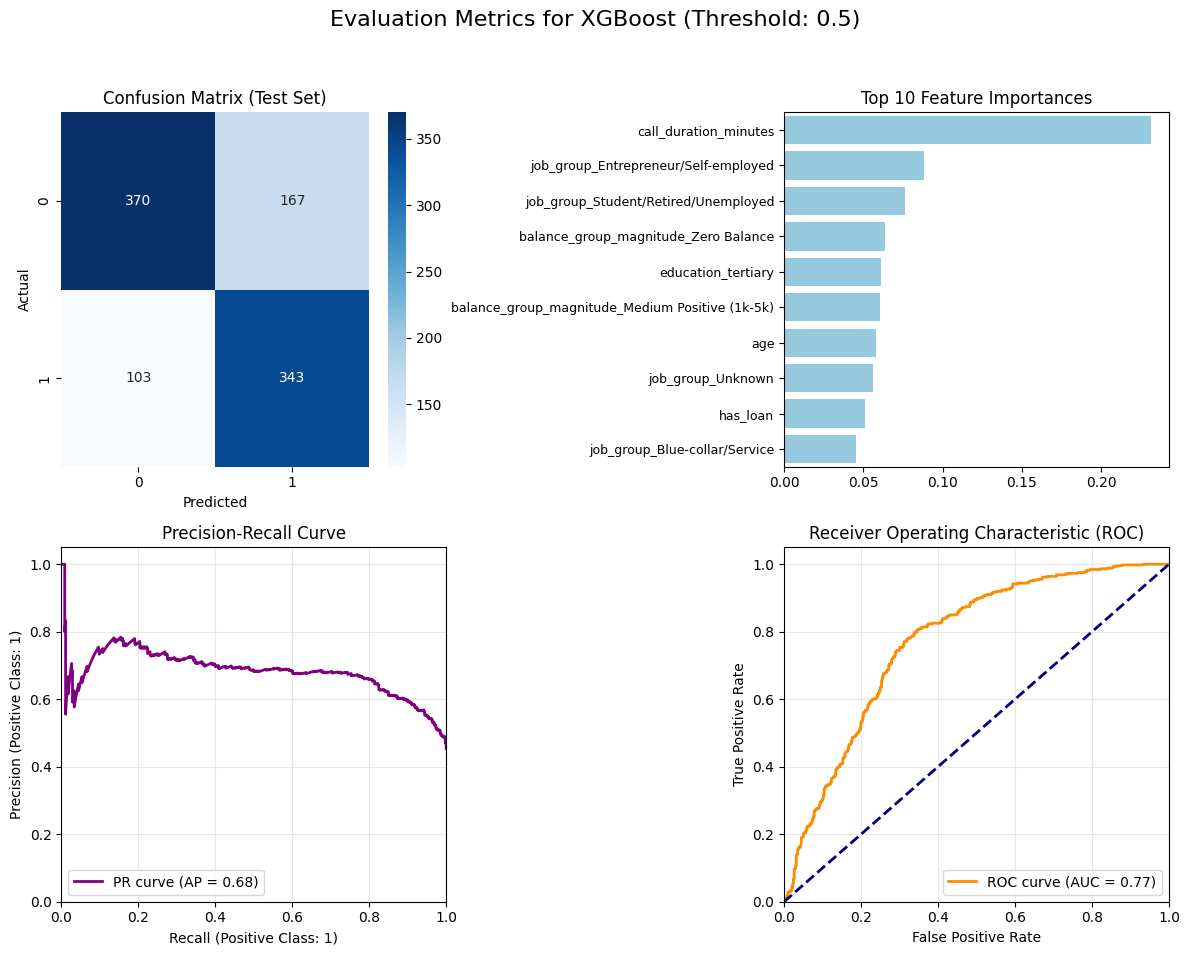

*** New best model (based on F1 Macro @ 0.5 thresh): XGBoost with F1: 0.7251 ***

Final Best model (based on f1_macro_at_0.5): XGBoost (0.7251)
PreprocessingPipeline saved to bank_marketing_models\preprocessor_pipeline.joblib

Saved PreprocessingPipeline, best model info, feature names and 3 models to bank_marketing_models


In [16]:
trained_models = classifier.train_models(
    train_data= df,
    test_size=0.2,
    random_state=42,
    stratify=True
)

> როგორც ვხედავთ, შედეგები გადასარევი არაა. ნორმალური შედეგი დადო XGBoost-მა, ამ შედეგთან ახლოს იყო რანდომ ფორესტიც. თუმცა, უნდა აღინიშნოს, რომ პროგნოზირებისთვის გამოყენებული გვაქვს პოტენციურად მისლიდინგ ზარის ხანგრძლივობის ცვლადი, რომელსაც ამასთანავე მნიშვნელოვანი დატვირთვა აქვს მოდელისთვის.
>
> შეგვიძლია შედეგებს უფრო დაბალ ალბათობის ზღვარზეც შევხედოთ:


--- Re-evaluating Best Model 'XGBoost' with Threshold 0.4 ---

--- Test @ 0.4 Set Performance (Threshold: 0.4) ---
Accuracy: 0.6979
F1 Score (Macro): 0.6963
Average Precision (AP): 0.6829
AUC Score: 0.7720
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.82      0.57      0.67       537
     Class 1       0.62      0.85      0.72       446

    accuracy                           0.70       983
   macro avg       0.72      0.71      0.70       983
weighted avg       0.73      0.70      0.69       983



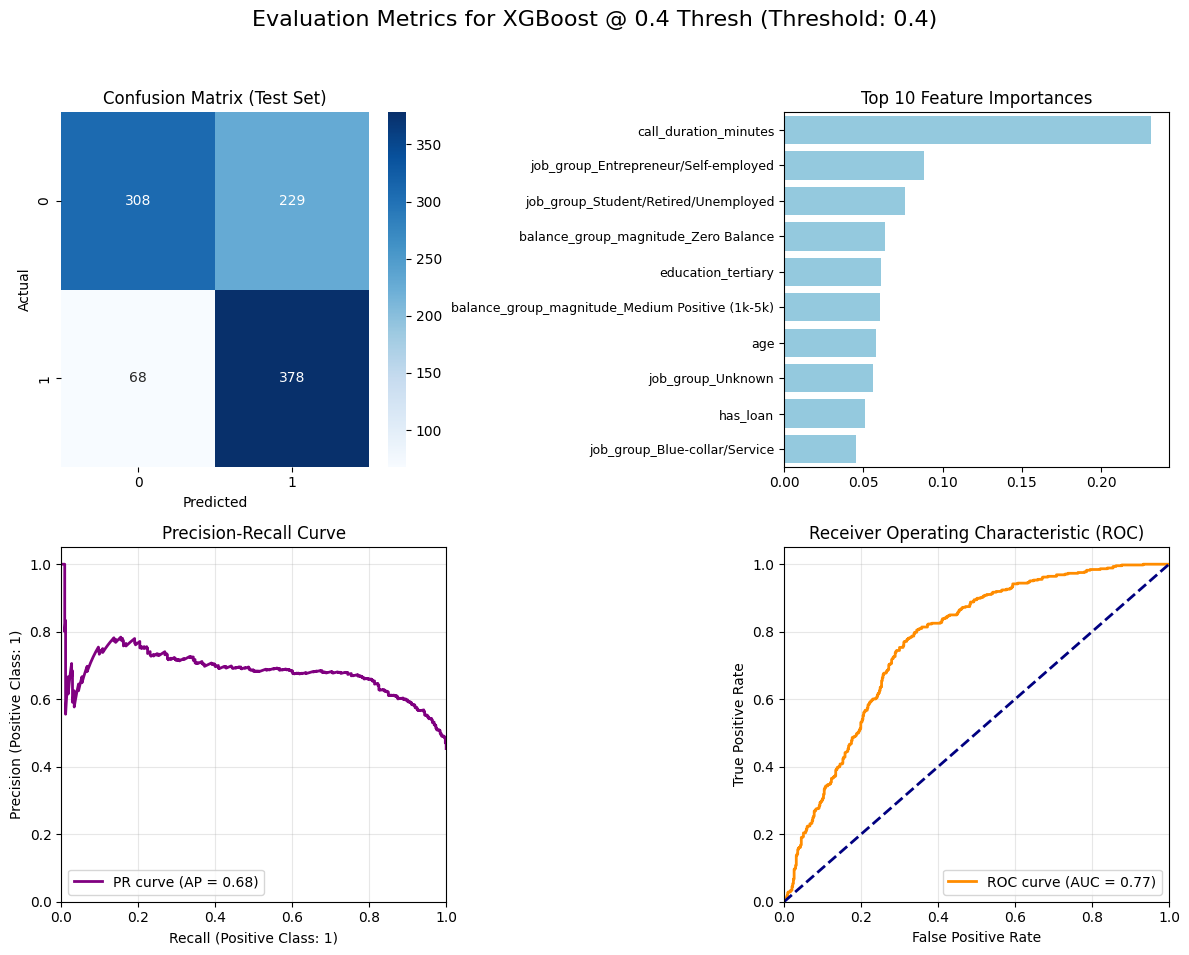

In [18]:
if hasattr(classifier, 'X_test_processed_') and hasattr(classifier, 'y_test_'):
    X_test_processed_stored = classifier.X_test_processed_
    y_test_stored = classifier.y_test_

    # Re-evaluating the best model with threshold 0.4
    if classifier.best_model:
        best_model_name, best_model_instance = classifier.best_model
        print(f"\n--- Re-evaluating Best Model '{best_model_name}' with Threshold 0.4 ---")
        test_metrics_thresh_04 = classifier.evaluate_model(
            model=best_model_instance,
            X=X_test_processed_stored,
            y=y_test_stored,
            label="Test @ 0.4",
            threshold=0.4
        )
        classifier.visualize_results(best_model_instance, test_metrics_thresh_04, f"{best_model_name} @ 0.4 Thresh")

> დაბალი ალბათობის ზღვარით პოზიტიური კლასის რექოლი გავზარდეთ, მაგრამ საკმაოდ ბევრი მისკლასიფიკაციაა. თუ პოტენციური მომხმარებლების დაკარგვა არ გვინდა და მომხმარებელთან დაკავშირების საკმარისი რესურსი გვაქვს, შეგვიძლია ალბათობის ზღვარი დავწიოთ. რესურსების შესაბამისად, კლიენთებთან დაკავშირებას ყველაზე მაღალი ალბათობის მქონე მომხმარებლებიდან დავიწყებთ. 

# SHAP Values

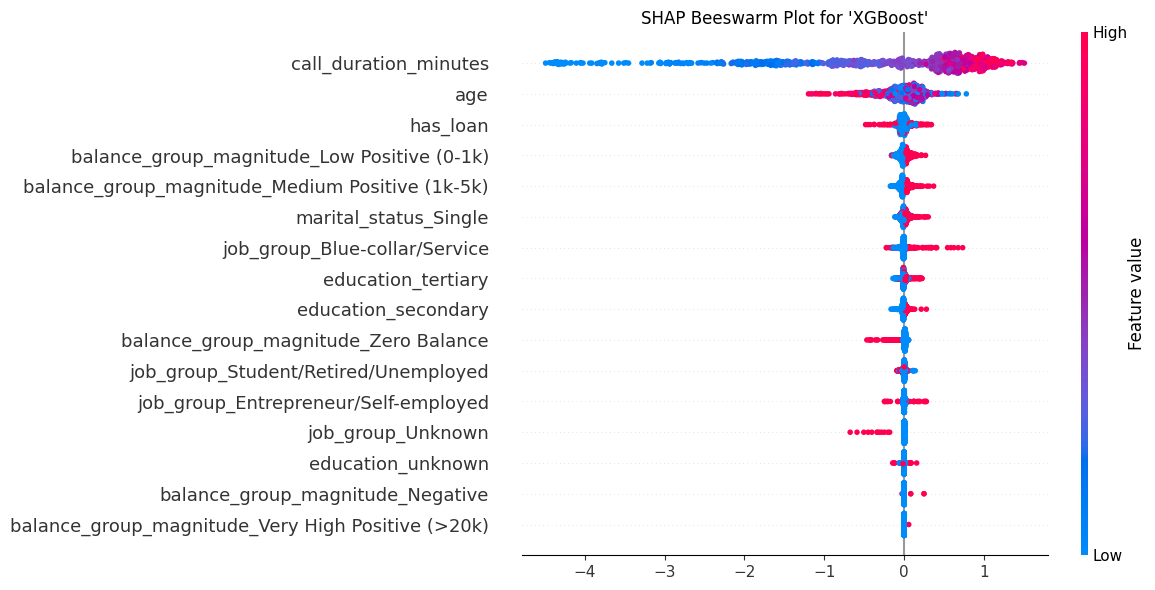

In [21]:
import shap

best_model_name, best_model_instance = classifier.best_model
X = classifier.X_test_processed_
feature_names = getattr(classifier, "feature_names_after_transform", None)
feature_names = X.columns.tolist()
explainer = shap.Explainer(best_model_instance, feature_names=feature_names)
shap_values = explainer(X)
positive_class = 1
shap_vals = shap_values[..., positive_class] if shap_values.values.ndim == 3 else shap_values
plt.figure(figsize=(14, 4))
shap.plots.beeswarm(shap_vals, max_display=20, show=False)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.title(f"SHAP Beeswarm Plot for '{best_model_name}'")
plt.subplots_adjust(left=0.3)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Predicting on New Data

In [23]:
model_name, model = classifier.best_model
X_predict = predict_data[classifier.all_input_features]
X_predict_processed = classifier.preprocessor.transform(X_predict)

positive_class_index = np.where(model.classes_ == 1)[0][0]
probs = model.predict_proba(X_predict_processed)[:, positive_class_index]
preds = (probs >= 0.4).astype(int)
predict_data['predicted'] = preds
predict_data['probability'] = probs

In [24]:
predict_data[predict_data['probability'] > 0.7][['predicted', 'probability']].sort_values('probability', ascending=False)

,predicted,probability
3442,1,0.889257
4791,1,0.863813
5342,1,0.834629
1849,1,0.826770
5315,1,0.821231
...,...,...
3978,1,0.707077
4054,1,0.707006
4077,1,0.706169
227,1,0.705023


> ჩვენი მოდელის მიხედვით, გვყავს 77 ისეთი მომხმარებელი, რომელიც 70%-ზე მეტი ალბათობით დათანმხდება ანაბრის გახსნას. შეგვიძლია მათგან დავიწყოთ დაკავშირება.